# Исследование оттока клиентов телеком-компании

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

**Описание услуг:**

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

**Описание данных:**

Данные состоят из файлов, полученных из разных источников.

* **`contract.csv`** - информация о договоре:

    - `customerID` - уникальный идентификатор клиента;
    
    - `BeginDate` - дата начала пользования услугами;
    
    - `EndDate` - дата окончания пользования услугами;
    
    - `Type` - тип оплаты (ежемесячный, годовой и т.д.);
    
    - `PaperlessBilling` - безналичный расчет;
    
    - `PaymentMethod` - способ оплаты;
    
    - `MonthlyCharges` - ежемесячные траты на услуги;
    
    - `TotalCharges` - всего потрачено денег на услуги;


* **`personal.csv`** — персональные данные клиента:

    - `customerID` - уникальный идентификатор клиента;
        
    - `Gender` - пол клиента;
        
    - `SeniorCitizen` - наличие пенсионного статуса по возрасту;
        
    - `Partner` - наличие супруга(и);
        
    - `Dependents` - наличие иждивенцев;


* **`internet.csv`** — информация об интернет-услугах:

    - `customerID` - уникальный идентификатор клиента;
    
    - `InternetService` - тип подключения интернета;
    
    - `OnlineSecurity` - наличие услуги блокировки небезопасных сайтов;
    
    - `OnlineBackup` - наличие облачного хранилища для создания резервных копий;
    
    - `DeviceProtection` - наличие услуги антивируса;
    
    - `TechSupport` - наличие выделенной линии тех. поддержки;
    
    - `StreamingTV` - наличие онлайн-телевидения;
    
    - `StreamingMovies` - наличие онлайн-кинотеатра;


* **`phone.csv`** — информация об услугах телефонии:

    - `customerID` - уникальный идентификатор клиента;
    
    - `MultipleLines` - наличие возможности ведения параллельных линий во время звонка;
    

**Ход исследования:**

* Знакомство с данными:
    - Предварительный обзор данных (значение, тип, количество);
    - Первичная предобработка данных (типы данных, пропуски, дубликаты и т.д.)
* Исследовательский анализ данных;
    - Информация о договорах (contract.csv)
    - Персональные данные клиентов (personal.csv)
    - Информация об интернет-услугах (internet.csv)
    - Информация об услугах телефонии (phone.csv)
* Подготовка данных для моделирования:
    - Объединение данных;
    - Кодирование признаков;
    - Выделение целевого признака и разбиение данных на выборки;
    - Приведение классов к балансу;
* Обучение моделей:
    - Модель случайного леса;
    - Логистическая регрессия;
    - Модель градиентного бустинга CatBoostClassifier;
    - Модель градиентного бустинга LGBMClassifier;
    - Подведение итогов обучения;
* Общий вывод.

## Знакомство с данными

In [1]:
# загрузка всех необходимых библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from scipy.special import softmax
import warnings

warnings.filterwarnings('ignore')

Загрузим все имеющиеся файлы с данными:

In [2]:
contract_df = pd.read_csv('/datasets/final_provider/contract.csv')
personal_df = pd.read_csv('/datasets/final_provider/personal.csv')
internet_df = pd.read_csv('/datasets/final_provider/internet.csv')
phone_df = pd.read_csv('/datasets/final_provider/phone.csv')

### Пердварительный обзор данных

In [3]:
# функция для обзора данных в каждом из датасетов

def overview(df):
    display(df.sample(10))
    display(df.info())
    print(f"Количество дубликатов в таблице: {df['customerID'].duplicated().sum()}")

Рассмотрим датафрейм `contract_df` с информацией о договорах:

In [4]:
overview(contract_df)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3736,2926-JEJJC,2019-06-01,No,One year,Yes,Bank transfer (automatic),20.20,140.95
6386,6656-GULJQ,2014-02-01,No,Two year,Yes,Credit card (automatic),83.55,6093.3
1799,9172-ANCRX,2019-03-01,2020-01-01 00:00:00,Month-to-month,Yes,Electronic check,98.70,973.25
3688,5312-UXESG,2016-09-01,No,Month-to-month,No,Bank transfer (automatic),98.05,3990.6
880,9851-KIELU,2019-03-01,2020-01-01 00:00:00,Month-to-month,Yes,Electronic check,110.10,1043.3
4776,0018-NYROU,2019-09-01,No,Month-to-month,Yes,Electronic check,68.95,351.5
5221,5336-UFNZP,2014-09-01,No,One year,Yes,Electronic check,107.45,7047.5
3797,7868-BGSZA,2016-07-01,No,One year,Yes,Electronic check,80.20,3581.6
6784,9546-KDTRB,2018-07-01,No,Month-to-month,No,Bank transfer (automatic),24.70,465.85
5223,1241-EZFMJ,2015-01-01,No,Two year,No,Bank transfer (automatic),25.45,1538.6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

Количество дубликатов в таблице: 0


* Имеем информацию о более чем 7 000 клиентах;

* На данном этапе пропуски в `contract_df` замечены не были;

* Строк-дубликатов тоже нет;

* Столбцы **BeginDate** и **EndDate** типа `object`, необходимо привести их к типу `datetime`. Кроме того, **EndDate** содержит в себе целевой признак: если клиент ушел - отмечена дата, если нет - указано `No`. Данные представлены на `01-02-2020`. Значит, `No` в **EndDate** заменим на эту дату.

* Столбцы **Type**, **PaperlessBilling**, **PaymentMethod** являются категориальными;

* **TotalCharges** необходимо привести к числовому типу `float`.

Далее, датафрейм с персональными данными клиентов `personal_df`:

In [5]:
overview(personal_df)

,customerID,gender,SeniorCitizen,Partner,Dependents
2883,7225-IILWY,Male,0,Yes,Yes
6031,0282-NVSJS,Female,1,Yes,Yes
2416,8982-NHAVY,Male,0,No,No
5066,7191-ADRGF,Male,0,Yes,No
1125,8111-SLLHI,Male,1,Yes,No
828,3104-OWCGK,Male,0,Yes,Yes
4743,6681-ZSEXG,Male,0,Yes,No
2157,1784-EZDKJ,Male,0,Yes,No
1859,4143-HHPMK,Male,0,No,No
2461,7706-YLMQA,Female,0,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

Количество дубликатов в таблице: 0


* Количество данных от предыдущего датафрейма не отличается;

* Пропуски не наблюдаются;

* Строк-дубликатов нет;

* Все признаки (кроме индекса) являются категориальными.

Следующий датафрейм с информацияе об интернет-услугах `internet_df`:

In [6]:
overview(internet_df)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
892,1459-QNFQT,DSL,Yes,No,Yes,Yes,Yes,Yes
3629,5172-RKOCB,Fiber optic,Yes,Yes,No,Yes,Yes,Yes
4694,4250-ZBWLV,Fiber optic,No,Yes,Yes,Yes,Yes,Yes
3131,5276-KQWHG,Fiber optic,No,No,No,No,No,No
817,7868-TMWMZ,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes
5155,6169-PGNCD,DSL,Yes,Yes,Yes,Yes,Yes,No
4105,1527-SXDPN,Fiber optic,No,No,Yes,Yes,No,Yes
939,5461-QKNTN,Fiber optic,No,Yes,No,Yes,Yes,No
2575,9194-GFVOI,DSL,Yes,No,Yes,Yes,Yes,Yes
2225,1215-VFYVK,DSL,Yes,No,Yes,Yes,No,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

Количество дубликатов в таблице: 0


* Не все клиенты пользуются интернет-услугами: только 5517 из общего числа (7043 клиента);

* Пропусков нет;

* Дубликатов нет;

* В этой таблице, как и в предыдущей, все признаки являются категориальными.

Изучим последний датафрейм с информацией об услугах телефонии `phone_df`:

In [7]:
overview(phone_df)

,customerID,MultipleLines
2893,5197-LQXXH,Yes
1440,5127-BZENZ,Yes
2190,5136-KCKGI,Yes
1936,5793-YOLJN,No
2658,0674-DGMAQ,Yes
3031,1513-XNPPH,No
6357,6840-RESVB,Yes
3844,1567-DSCIC,Yes
2699,6898-MDLZW,No
3567,3871-IKPYH,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

Количество дубликатов в таблице: 0


* Клиентов, использующих услуги телефонии больше, чем клиентов, использующих интернет услуги, однако их все еще меньше общего числа клиентов в выборке: 6361;

* Пропусков нет;

* Дубликатов нет.

**Вывод:**

* Наибольшую работу по предобработке данных необходимо провести с датафреймом `contract_df`.

* Целевой признак косвенно содержится в столбце **EndDate**: нужно преобразовать этот столбец в тип даты, а целевой признак вынести в новый столбец для удобства. 

* В остальных таблицах нет проблем, которые стоит решать на этапе первичной предобработки. 

### Первичная предоработка данных

Для дальнейшего удобства приведем названия столбцов датафреймов к нижнему регистру:

In [8]:
for df in [contract_df, personal_df, internet_df, phone_df]:
    display(df.columns)

Index(['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents'], dtype='object')

Index(['customerID', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

Index(['customerID', 'MultipleLines'], dtype='object')

In [9]:
contract_df = contract_df.rename({'customerID': 'customer_id', 
                                    'BeginDate': 'begin_date', 
                                    'EndDate': 'end_date', 
                                    'Type': 'type', 
                                    'PaperlessBilling': 'paperless_billing', 
                                    'PaymentMethod': 'payment_method', 
                                    'MonthlyCharges': 'monthly_charges', 
                                    'TotalCharges': 'total_charges'},  axis='columns')

personal_df = personal_df.rename({'customerID': 'customer_id', 
                                  'SeniorCitizen': 'senior_citizen', 
                                  'Partner': 'partner', 
                                  'Dependents': 'dependents'},  axis='columns')

internet_df = internet_df.rename({'customerID': 'customer_id', 
                                  'InternetService': 'internet_service', 
                                  'OnlineSecurity': 'online_security', 
                                  'OnlineBackup': 'online_backup', 
                                  'DeviceProtection': 'device_protection', 
                                  'TechSupport': 'tech_support', 
                                  'StreamingTV': 'streaming_tv', 
                                  'StreamingMovies': 'streaming_movies'},  axis='columns')

phone_df = phone_df.rename({'customerID': 'customer_id', 
                            'MultipleLines': 'multiple_lines'},  axis='columns')

Рассмотрим датафрейм с информацией о договорах `contract_df`. Из признака **end_date** выведем целевой признак **churn**, где 
* `1` - клиент ушел (в **end_date** есть дата);

* `0` - клиент все еще пользуется услугами компании (в **end_date** стоит "No"). 

In [10]:
contract_df['churn'] = contract_df['end_date'].apply(lambda x: x if x == 'No' else 'Yes')

Данные актуальны на 01-02-2020, значит в признаке **end_date** для клиентов, все еще пользующихся услугами компании, нужно поставить эту дату:

In [11]:
contract_df['end_date'] = contract_df['end_date'].apply(lambda x: '2020-02-01' if x == 'No' else x)

Теперь можно привести признаки **begin_date** и **end_date** к типу `datetime`

In [12]:
contract_df['begin_date'] = pd.to_datetime(contract_df['begin_date'], format='%Y-%m-%d')
contract_df['end_date'] = pd.to_datetime(contract_df['end_date'], format='%Y-%m-%d')

Теперь можно найти разницу между датами подключения к оператору и прекращения договора. Этот признак может быть полезен в дальнейшем исследовательском анализе данных и обучении моделей:

In [13]:
contract_df['duration'] = (contract_df['end_date'] - contract_df['begin_date'])
contract_df['duration'] = (contract_df['duration'] / np.timedelta64(1, 'D')).astype('int')

Продолжим преобразование типов данных и приведем **total_charges** к числовому типу:

In [14]:
contract_df['total_charges'] = pd.to_numeric(contract_df['total_charges'], errors='coerce')

contract_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7032 non-null   float64       
 8   churn              7043 non-null   object        
 9   duration           7043 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 550.4+ KB


В столбце **total_charges** появилось небольшое количество пропусков. Рассмотрим их:

In [15]:
contract_df[contract_df['total_charges'].isna()]

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,churn,duration
488,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,0
753,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,NaN,No,0
936,5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,NaN,No,0
1082,4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,NaN,No,0
1340,1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,NaN,No,0
3331,7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,NaN,No,0
3826,3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,NaN,No,0
4380,2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,NaN,No,0
5218,2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,NaN,No,0
6670,4075-WKNIU,2020-02-01,2020-02-01,Two year,No,Mailed check,73.35,NaN,No,0


Все эти клиенты начали пользоваться услугами компании на момент сбора данных, то есть не прошло и дня с тех пор, как был заключен договор. Разумнее всего заполнить пропуски в **total_charges** значениями из столбца **monthly_charges**:

In [16]:
contract_df['total_charges'] = np.where(contract_df['total_charges'] > 0,
                                       contract_df['total_charges'], contract_df['monthly_charges'])

contract_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   churn              7043 non-null   object        
 9   duration           7043 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 550.4+ KB


Пропусков больше нет, все данные приведены к нужным типам. 

**Вывод:**

* Все названия столбцов приведены к нижнему регистру для удобства использования;
* Столбцы **begin_date** и **end_date** приведены к типу `datetime`;
* Выведены два новых признака: 
    - **duration** - длительность использования клиентом услуг компании;
    - **churn** (целевой признак) - ушел клиент или нет;
* **total_charges** приведен к числовому типу, а пропуски заполнены.
* Первичная предобработка проведена, теперь можно приступать к исследовательскому анализу данных.

## Исследовательский анализ данных

### Информация о договорах

Сначала более детально изучим датафрейм с информацией о договорах `contract_df`. Рассмотрим распределения категориальных признаков:

In [17]:
#функция строит гистограммы для категориальных признаков

def categorical_plot(df, column):
    sns.set_style('darkgrid')
    fig, ax = plt.subplots(figsize=(12, 5))
    plt.xticks(rotation=0)
    sns.countplot(x=column, data=df, palette='Accent')
    ax.set_title(f'Распределение по {column}')
    plt.ylabel('Количество')

[None, None, None, None]

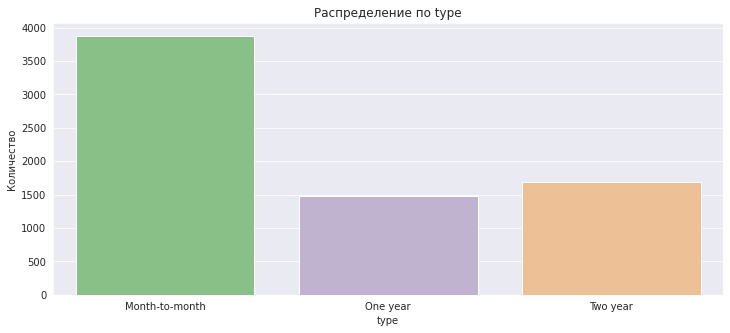

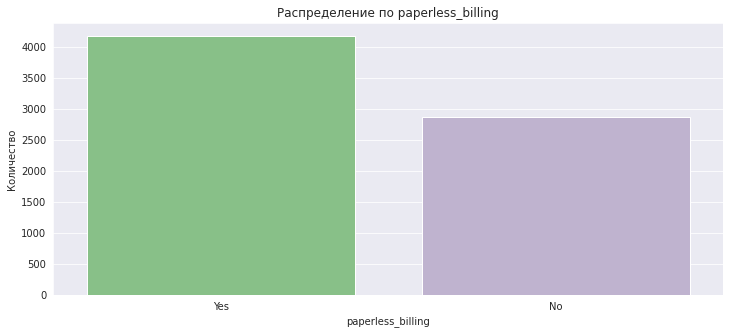

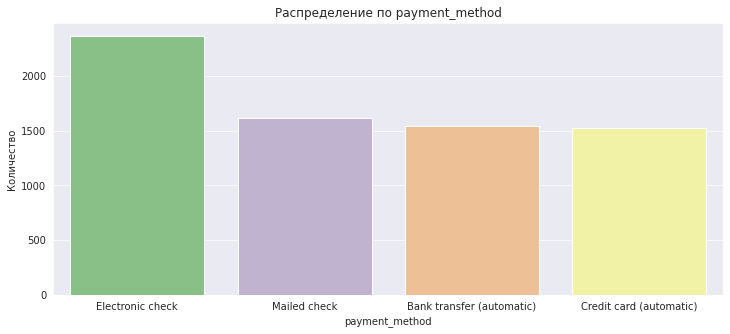

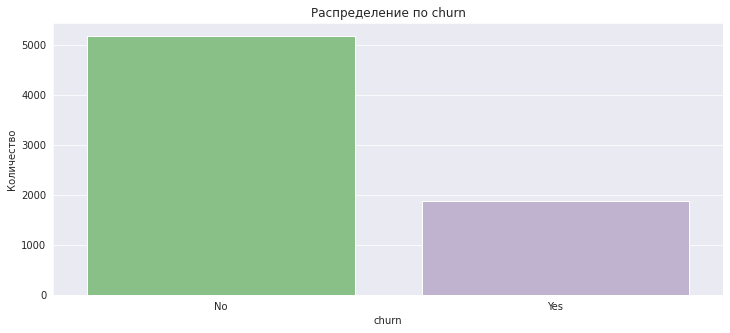

In [18]:
categories = ['type', 'paperless_billing', 'payment_method', 'churn']

[categorical_plot(contract_df, column) for column in categories]

* Наиболее распространенный способ оплаты услуг - ежемесячный: его использует около 50% всех клиентов. Остальные способы оплаты (`One year` и `Two year`) используют по 25% клинетов;

* Безналичный расчет более популярен;

* Больше всего клиентов выбирают `Electronic check` в качество способа оплаты, остальные же способы оплаты выбирает примерно одинаковое количество клиентов;

* Признак **churn** является целевым и в нем сразу виден дисбаланс классов: ушедших клинетов в имеющейся выборке гораздо меньше, чем клиентов, которые еще пользуются услугами компании. 

Теперь рассмотрим распределение категориальных признаков относительно целевого признака:

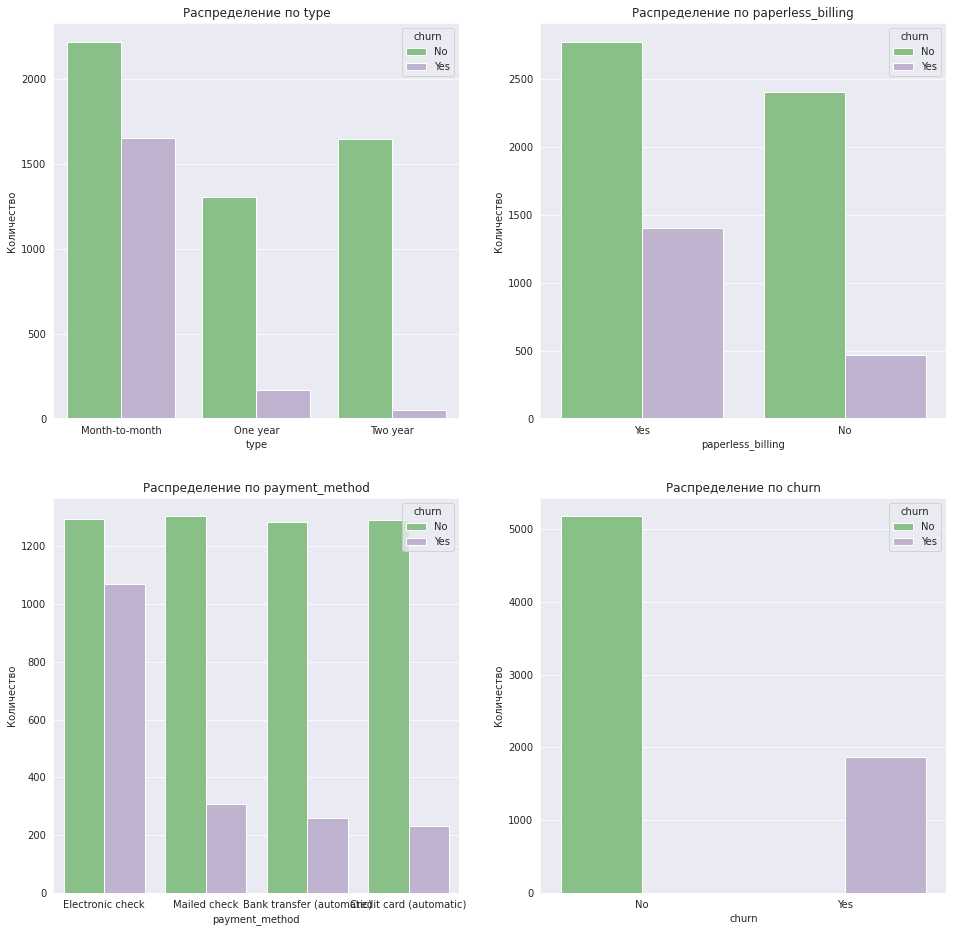

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))
for idx, feat in enumerate(categories):
    sns.countplot(contract_df[feat], hue='churn', data=contract_df, ax=ax[idx // 2, idx % 2], palette='Accent')
    ax[idx//2, idx%2].set_xticklabels(ax[idx//2, idx%2].get_xticklabels(), rotation=0)
    ax[idx//2, idx%2].set_title('Распределение по ' + feat)
    ax[idx//2, idx%2].set_ylabel('Количество'); 

* Чаще всего уходят клиенты, оплачивающие услуги ежемесячно;

* Клиенты, оплачивающие услуги безналично более склонны к уходу;

* Клиенты, выбирающие в качестве способа платежа `Electronic check` уходят чаще всего: их количество почти равно количеству лояльных клиентов. 

Теперь изучим количественные признаки **monthly_charges**, **total_charges** и **duration**. Построим графики распределения этих признаков и для большей информативности выведем их описания и построим боксплоты.

In [20]:
#  функция строит графики распределения для количественных признаков

def numerical_plot(df, column):
    fig, ax = plt.subplots(figsize=(12, 5))
    sns.distplot(df[column])
    ax.set_title('Распределение по ' + column)
    plt.ylabel('Плотность частоты')
    plt.show()
    
    plt.figure(figsize=(16, 3))
    sns.boxplot(df[column], palette='Accent').set(xlabel='Значения', ylabel=column)
    plt.title(label=column)
    plt.show()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: monthly_charges, dtype: float64

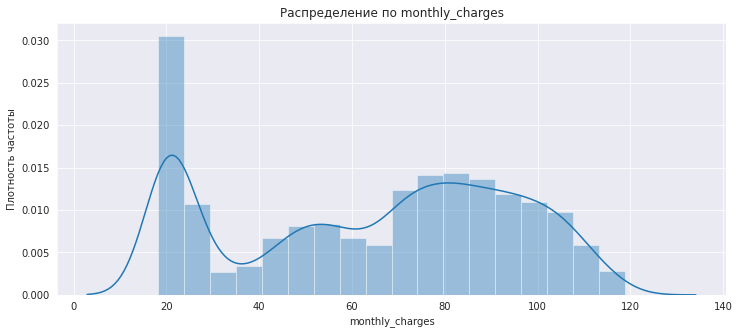

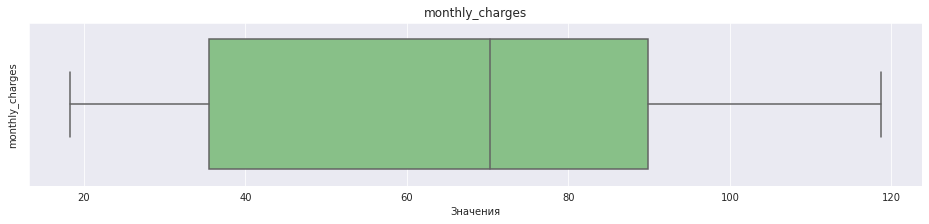

count    7043.000000
mean     2279.798992
std      2266.730170
min        18.800000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: total_charges, dtype: float64

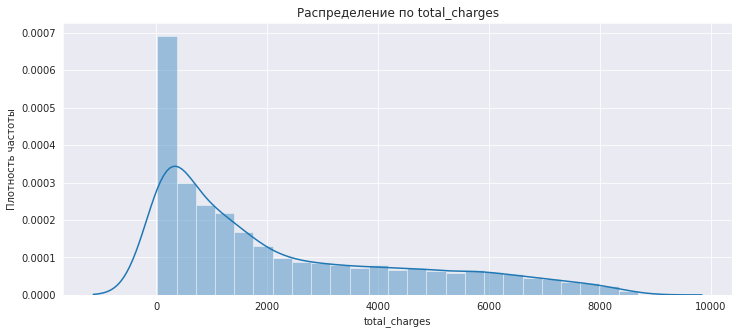

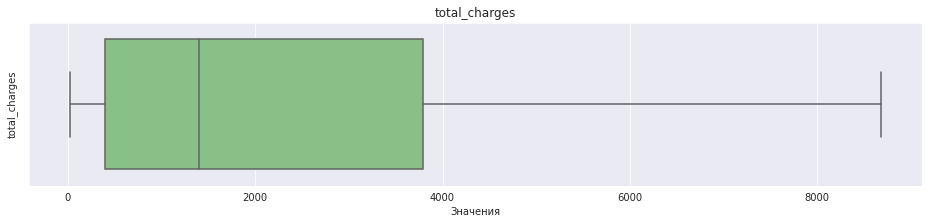

count    7043.000000
mean      985.996166
std       747.587844
min         0.000000
25%       273.000000
50%       883.000000
75%      1676.000000
max      2191.000000
Name: duration, dtype: float64

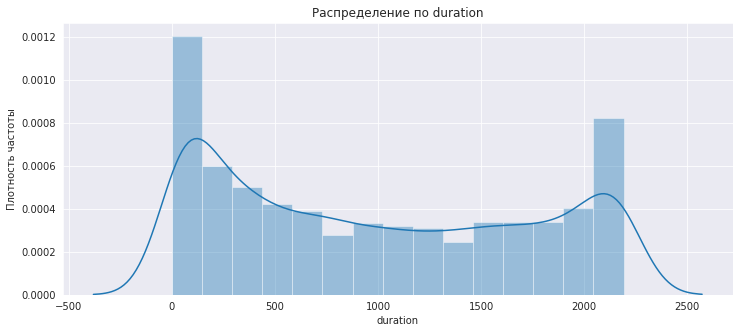

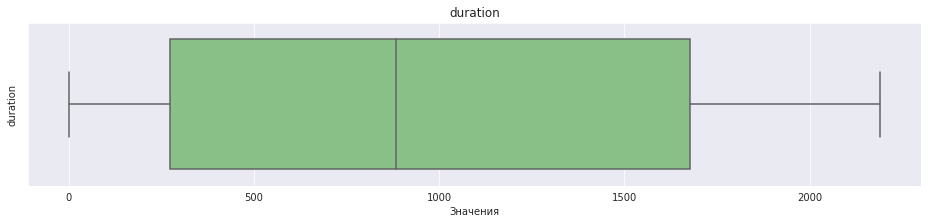

In [21]:
numerical = ['monthly_charges', 'total_charges', 'duration']

for column in numerical:
    display(contract_df[column].describe())
    numerical_plot(contract_df, column)

* Признак **monthly_charges** распределен бимодально, высокая частота наблюдается на значениях 20 и 80. В среднем ежемесячный платеж равен 64.7;

* Признак **total_charges** имеет нормальное распределение со смещением влево: медиана принимает значение 1394, а значения после 4000 уже являются выбросами;

* Признак **duration** распределен бимодально, высокая частота в значениях меньше полугода и больше 3 лет. В среднем клиенты, представленные в выборке, пользуются услугами компании около двух с половиной лет. 

Теперь изучим корреляцию между всеми признаками датафрейма `contract_df`, следя за значениями целевого признака **churn** (ушел клиент или нет):

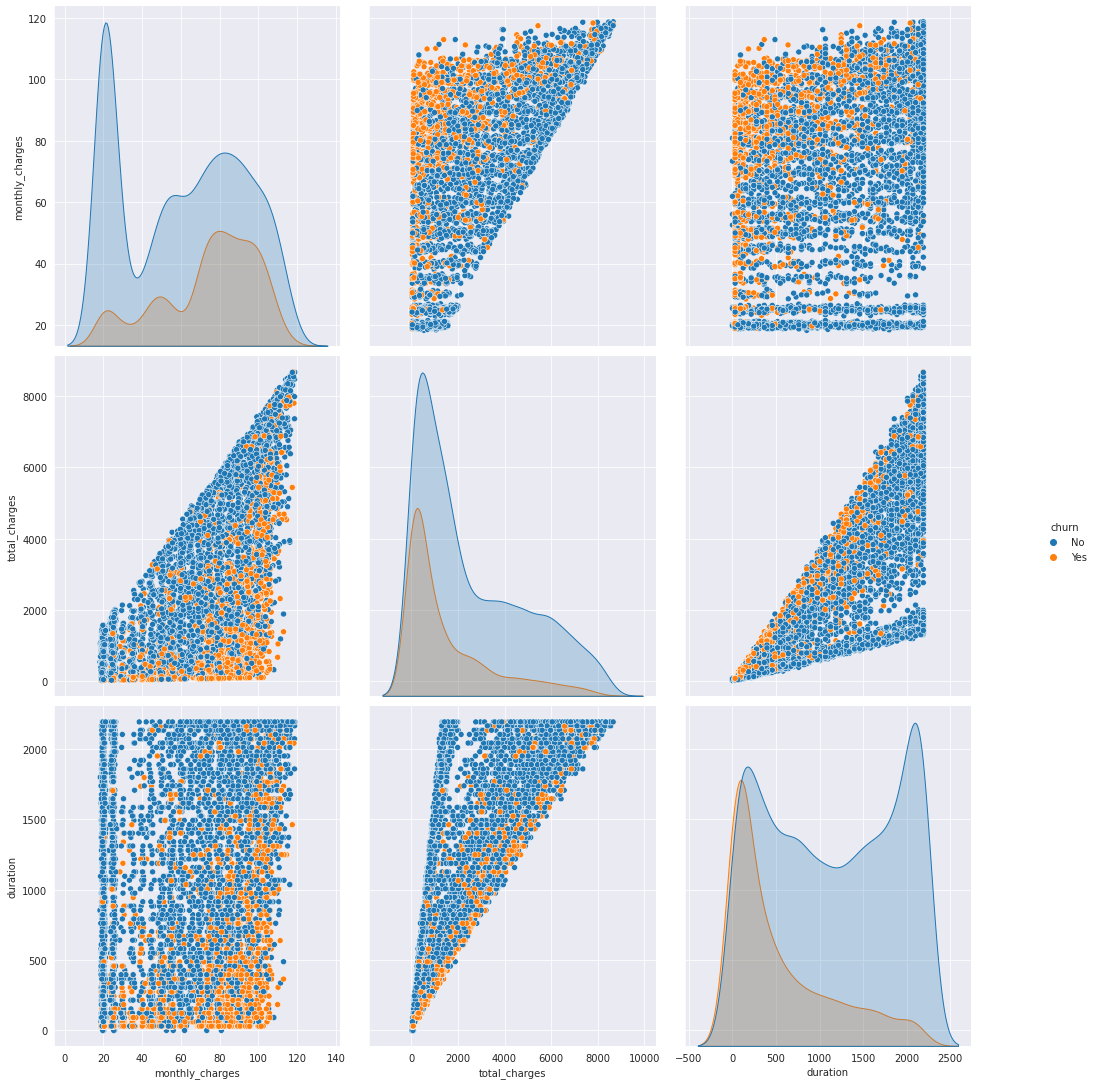

In [22]:
sns.pairplot(contract_df, hue='churn', hue_order=['No', 'Yes']).fig.set_size_inches(16, 16)

In [23]:
contract_df.corr()

,monthly_charges,total_charges,duration
monthly_charges,1.000000,0.651182,0.247754
total_charges,0.651182,1.000000,0.826095
duration,0.247754,0.826095,1.000000


* Чем больше сумма ежемесячного платежа, тем больше клиентов уходит;

* Что качается общей потраченной суммы, ее распределение для ушедших и оставшихся клиентов не меняется;

* Большая часть клиентов прекратила использование услуг компании на первых месяцах после начала использования;

* Наблюдается сильная положительная корреляция между признаками **total_charges** и **duration**, что, на самом деле, очевидно, и менее сильная положительная корреляция между признаками **monthly_charges** и **total_charges**. 

### Персональные данные

Теперь перейдем к персональным данным клиентов, представленных в датафрейме `personal_df`. Чтобы сразу изучить распределение признаков отностельно целевого признака, добавим в таблицу `personal_df` целевой признак по значению ID клиента. 

In [24]:
# временная таблица с ID клиентов и их целевым признаком, для последующего добавления колонки churn в personal_df

id_churn_df = pd.DataFrame(contract_df.loc[:, ['customer_id', 'churn']])
personal_churn_df = personal_df.merge(id_churn_df, on='customer_id')

personal_churn_df.head()

,customer_id,gender,senior_citizen,partner,dependents,churn
0,7590-VHVEG,Female,0,Yes,No,No
1,5575-GNVDE,Male,0,No,No,No
2,3668-QPYBK,Male,0,No,No,Yes
3,7795-CFOCW,Male,0,No,No,No
4,9237-HQITU,Female,0,No,No,Yes


Теперь построим графики распределения признаков относительно целевого признака:

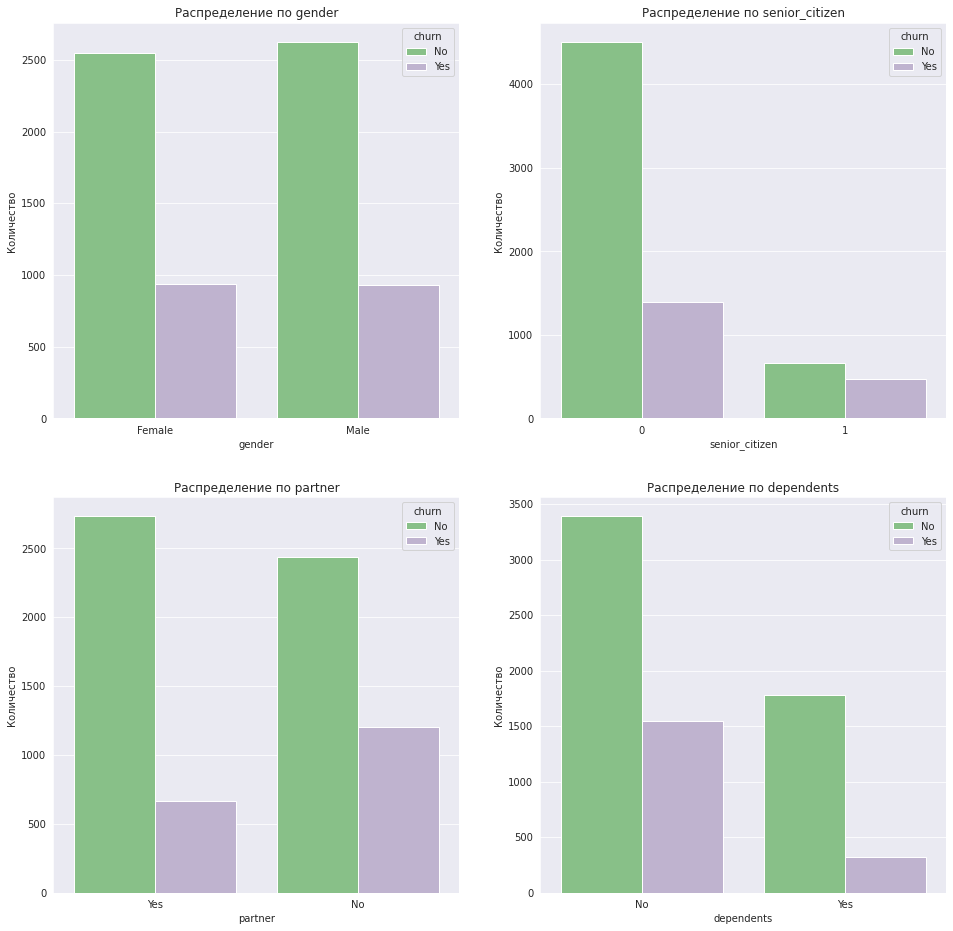

In [25]:
categories = ['gender', 'senior_citizen', 'partner', 'dependents']

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))
for idx, feat in enumerate(categories):
    sns.countplot(personal_churn_df[feat], hue='churn', data=personal_churn_df, ax=ax[idx // 2, idx % 2], palette='Accent')
    ax[idx//2, idx%2].set_xticklabels(ax[idx//2, idx%2].get_xticklabels(), rotation=0)
    ax[idx//2, idx%2].set_title('Распределение по ' + feat)
    ax[idx//2, idx%2].set_ylabel('Количество')

* Зависимости от пола клиентов не наблюдается: и мужчины, и женщины отказываются от услуг компании в равной мере;

* Среди пенсионеров большая часть клиентов отказывается от услуг (возможно из-за цен на услуги или же по независящим от компании причинам);

* Клиенты, не имеющие супруга(-и), уходят чаще;

* Клиенты, не содержащие иждивенцев, чуть более чаще отказываются от услуг.

### Интернет-услуги

Снова сделаем временную таблицу, содержащую признаки из таблицы `internet_df` и цеелфой признак **churn**, чтобы проанализировать данные с точки зрения факта ухода клиентов из компании. 

In [26]:
internet_churn_df = internet_df.merge(id_churn_df, on='customer_id')

internet_churn_df.head()

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,churn
0,7590-VHVEG,DSL,No,Yes,No,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No,Yes
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No,Yes


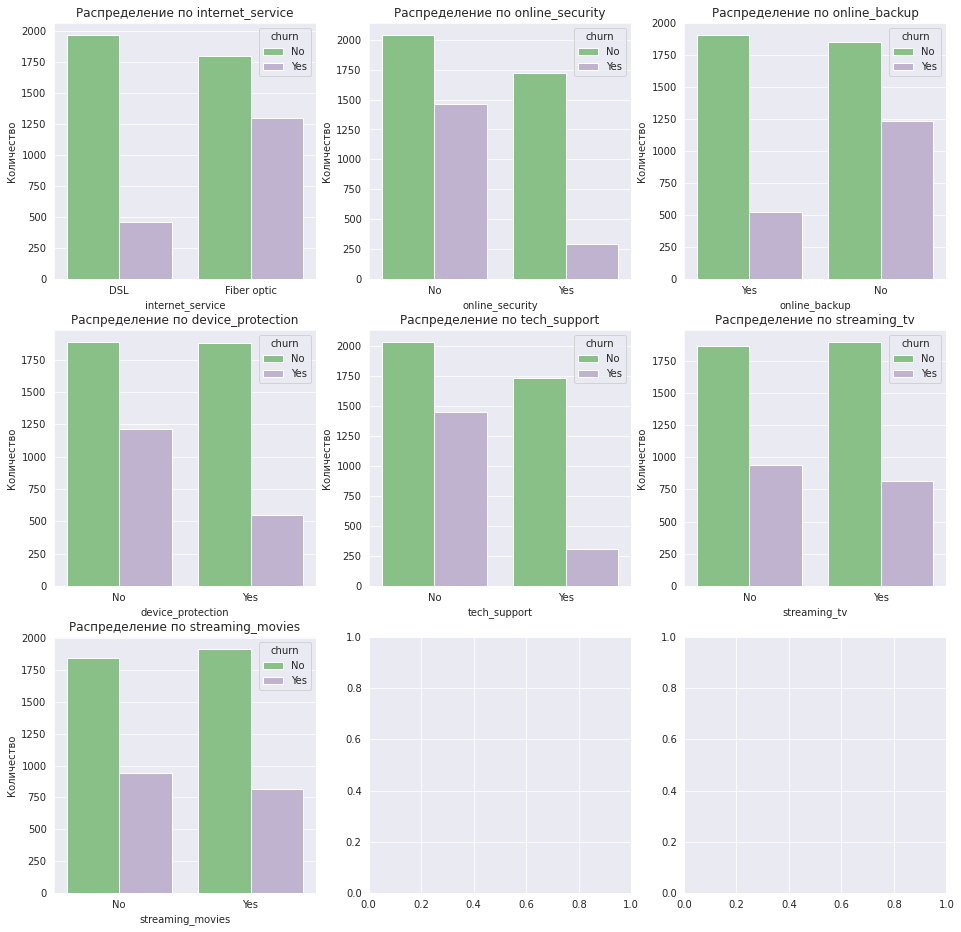

In [27]:
categories = internet_churn_df.columns[1:8]

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))
for idx, feat in enumerate(categories):
    sns.countplot(internet_churn_df[feat], hue='churn', data=internet_churn_df, ax=ax[idx // 3, idx % 3], palette='Accent')
    ax[idx//3, idx%3].set_xticklabels(ax[idx//3, idx%3].get_xticklabels(), rotation=0)
    ax[idx//3, idx%3].set_title('Распределение по ' + feat)
    ax[idx//3, idx%3].set_ylabel('Количество')

* Клиенты с типом подключения к интернету `Fiber optic` уходят намного чаще, чем клиенты с типом подключения `DSL`;

* Клиенты, не имеющие услуги блокировки небезопасных сайтов покидают компанию чаще;

* Клиенты уходят чаще, если у них нет облачного хранилища для создания резервных копий;

* Клиенты, не обладающие услугой антивируса также чаще отказываются от услуг компании;

* Клиента без доступа к услугам тех.поддержки в большей мере склонны к уходу;

* Зависимости ухода клиентов от наличия услуги онлайн-телевидения или онлайн-кинотеатра замечено не было.

### Услуги телефонии

Повторим алгоритм анализа и для данных об услугах телефонии из датафрейма `phone_df`. Обединим таблицу с целевым признаком. 

In [28]:
phone_churn_df = phone_df.merge(id_churn_df, on='customer_id')

phone_churn_df.head()

,customer_id,multiple_lines,churn
0,5575-GNVDE,No,No
1,3668-QPYBK,No,Yes
2,9237-HQITU,No,Yes
3,9305-CDSKC,Yes,Yes
4,1452-KIOVK,Yes,No


Text(0, 0.5, 'Количество')

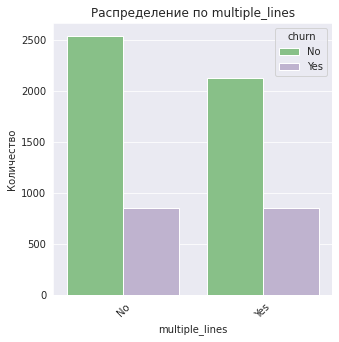

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
sns.countplot(phone_churn_df['multiple_lines'], hue='churn', data=phone_churn_df, ax=ax, palette='Accent')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Распределение по multiple_lines')
ax.set_ylabel('Количество')

Получается, что наличие возможности ведения параллельных линий во время звонка не влияет на решение клиента отказаться от услуг компании. 

**Вывод:**

Итак, подведем итоги проведенного исследовательского анализа данных.

* Активные клиенты чаще всего имеют относительно небольшие ежемесячные платежи, в то время как у ушедших клиентов платежи были довольно высокими, возможно, это и стало причиной их ухода;

* Чаще всего клиенты уходят уже в течение ближайших месяцев после заключения договора, активные клиенты же остаются в компании на долгое время;

* Обнаружен дисбаланс классов в целевом признаке **churn**;

* Почти 50% клиентов, выбравших в качестве способо платежа Electronic Check, ушли из компании. Это может быть связано с проблемами в системе онлайн оплаты;

* Наличие супруга(и) и детей положительно сказываются на том, что клиенты остаются в компании;

* Пол не влияет на уход клиента;

* Различные подключенные интернет-услуги положительно влияют на удержание клиентов в компании.

## Подготовка данных к моделированию

### Объединение данных

Итак, у нас есть четыре датафрейма: **contract_df**, **personal_df**, **internet_df**, **phone_df**. Единственным общим столбцом для них является уникальный идентификатор клиента `customer_id`, по нему и проведем объединение таблиц. Так как в таблицах **internet_df** и **phone_df** количество строк меньше, чем в основных таблицах, выберем тип слияния `outer`:

In [30]:
df = contract_df.merge(personal_df, on='customer_id', how='outer') \
                .merge(internet_df, on='customer_id', how='outer') \
                .merge(phone_df, on='customer_id', how='outer')

df.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,churn,duration,...,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,No,31,...,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,No,1036,...,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,61,...,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,No,1371,...,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,61,...,No,No,Fiber optic,No,No,No,No,No,No,No


Заменим значения целевого признака **Churn** на (0, 1):

In [31]:
df['churn'] = df['churn'].apply(lambda x: 1 if x == 'Yes' else 0)

Теперь избавимся от ненужных для обучения признаков:

* `customer_id`

* `begin_date`

* `end_date`

In [32]:
df = df.drop(['customer_id', 'begin_date', 'end_date'], axis=1)

### Кодирование признаков

Преобразуем категориальные признаки в численные с помощью техники прямого кодирования **OHE** (One-Hot Encoding):

In [33]:
df_ohe = pd.get_dummies(df, drop_first=True)
df_ohe

,monthly_charges,total_charges,churn,duration,senior_citizen,type_One year,type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,...,partner_Yes,dependents_Yes,internet_service_Fiber optic,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,multiple_lines_Yes
0,29.85,29.85,0,31,0,0,0,1,0,1,...,1,0,0,0,1,0,0,0,0,0
1,56.95,1889.50,0,1036,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,53.85,108.15,1,61,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,42.30,1840.75,0,1371,0,1,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
4,70.70,151.65,1,61,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,84.80,1990.50,0,730,0,1,0,1,0,0,...,1,1,0,1,0,1,1,1,1,1
7039,103.20,7362.90,0,2191,0,1,0,1,1,0,...,1,1,1,0,1,1,0,1,1,1
7040,29.60,346.45,0,337,0,0,0,1,0,1,...,1,1,0,1,0,0,0,0,0,0
7041,74.40,306.60,1,123,1,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,1


### Разбиение данных на выборки

Теперь разделим имеющиеся данные на обучающую и тестовую выборки в соотношении 3:1

In [34]:
features, target = df_ohe.drop(['churn'], axis=1), df_ohe['churn']

# выделение обучающей и тестовой выборок размером 75% и 25%
train_ft, test_ft, train_tg, test_tg = train_test_split(features, target, test_size=0.25, random_state=80822)

Проверим размеры получившизся выборок:

In [35]:
print(f'Объем обучающей выборки: {train_ft.shape[0]} объектов')
print(f'Объем тестовой выборки: {test_ft.shape[0]} объектов')

Объем обучающей выборки: 5282 объектов
Объем тестовой выборки: 1761 объектов


### Масштабирование признаков и приведение классов к балансу

Для того, чтобы отмаштабировать признаки, воспользуемся одним из методов масштабирования — стандартизации данных. В sklearn есть отдельная структура для стандартизации данных — **StandardScaler**

In [36]:
numerical =  train_ft.iloc[:, :3].columns

scaler = StandardScaler()
scaler.fit(train_ft[numerical])

train_ft[numerical] = scaler.transform(train_ft[numerical])
test_ft[numerical] = scaler.transform(test_ft[numerical])

На этапе исследовательского анализа данных был замечен дисбаланс классов в целевом признаке: ушедших клиентов почти в три раза меньше, чем оставшихся. Сделаем балансировку используя технику увеличения выборки `upsampling`.

In [43]:
def upsample(ft, tg, repeat):
    ft_zeros = ft[tg == 0]
    ft_ones = ft[tg == 1]
    tg_zeros = tg[tg == 0]    
    tg_ones = tg[tg == 1]    
    
    ft_upsampled = pd.concat(
        [ft_zeros] + [ft_ones] * repeat)    
    tg_upsampled = pd.concat(
        [tg_zeros] + [tg_ones] * repeat)    
    ft_upsampled, tg_upsampled = shuffle(        
        ft_upsampled, tg_upsampled, random_state=111) 
    
    return ft_upsampled, tg_upsampled

Теперь применим `upsample` к  обучающей выборке и проверим баланс классов:

In [44]:
train_ft_up, train_tg_up = upsample(train_ft, train_tg, 3)

print(train_ft_up.shape)
print(train_tg_up.shape)

(8038, 21)
(8038,)


In [53]:
scale_pos_weight = round((len(train_tg_up[train_tg_up == 0]) / 
                          len(train_tg_up[train_tg_up == 1])), 3)
scale_pos_weight

0.944

Классы сбалансированы.

**Вывод:**

* Данные четырех датафреймов объединены в один, а признаки `customer_id`, `begin_date` и `end_date` удалены, так как не нужны для обучения;

* Все категориальные признаки были закодированы с помощью **OHE**;

* Данные разделены на обучающую и тестовую выборки;

* Все количественные признаки приведены к одному масштабу с помощью **StandardScaler**;

* Устранен дисбаланс в целевом признаке. 

## Обучение моделей

Проверим в действии следующие модели:

* Модель случайного леса: `RandomForestClassifier`

* Модель логистической регрессии: `LogisticRegression`

* Модель градиентного бустинга: `CatBoostClassifier`

* Модель градиентного бустинга: `LGBMClassifier`

Оценку качества моделей будем проводить с помощью метрики `AUC-ROC` и следить за метрикой `accuracy`.

Для подбора гиперпараметров будем использовать **GridSearchCV**.

Так как процедура обучения и предсказания для всех моделей будет примерно одинакова, создадим отдельные функции, отвечающие за это и за расчет времени:

In [63]:
# Функция подбора лучших гиперпараметров

def model_learn(model, params):
    cv = ShuffleSplit(n_splits=3, test_size=0.25, random_state=111)
    grid_model = GridSearchCV(model, params, scoring='roc_auc', cv=cv)
    grid_model.fit(train_ft_up, train_tg_up)
    print(f'Лучшее значение метрики ROC-AUC: {grid_model.best_score_}')
    print(f'Лучшие гиперпараметры: {grid_model.best_params_}')
    print(f'Лучшая модель: {grid_model.best_estimator_}')
    
    return grid_model.best_estimator_

In [55]:
# Функция оценки качества обученной модели на тестовой выборке

def model_test(model):
    pred_proba_test = model.predict_proba(test_ft)[:, 1]
    pred_test = model.predict(test_ft)
    print(f'Accuracy: {round(model.score(test_ft, test_tg), 3)}')
    print(f'AUC-ROC: {round(roc_auc_score(test_tg, pred_proba_test), 3)}')
    
    fpr, tpr, thresholds = roc_curve(test_tg, pred_proba_test)
    sns.set()
    plt.figure(figsize=(12, 5))
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.show()

In [68]:
# функция оценки важности признаков

def ft_importance(model):
    feats={}
    for feature, importance in zip(train_ft.columns, model.feature_importances_):
        feats[feature] = importance
    importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
    importances = importances.sort_values(by='Gini-Importance', ascending=False)
    importances = importances.reset_index()
    importances = importances.rename(columns={'index': 'Features'})
    sns.set(font_scale = 5)
    sns.set(color_codes=True, font_scale = 1.7)
    fig, ax = plt.subplots()
    fig.set_size_inches(30,15)
    sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
    plt.xlabel('Важность', fontsize=25, weight = 'bold')
    plt.ylabel('Признаки', fontsize=25, weight = 'bold')
    plt.title('Важность признаков', fontsize=25, weight = 'bold')
    display(plt.show())
    display(importances)

### Модель случайного леса

Приступим к обучению модели случайного леса. На кросс валидации будем использовать следующие гиперпараметры:

* `n_estimators` - количество решающих деревьев;

* `max_depth` - глубина дерева;

* `min_samples_leaf` - минимальное количество примеров для образования листа

* `min_samples_split` - минимальное количество примеров для образования узла

Обучим модель и проверим ее на тестовой выборке:

Лучшее значение метрики ROC-AUC: 0.974333605519362
Лучшие гиперпараметры: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}
Лучшая модель: RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=80822)
Accuracy: 0.793
AUC-ROC: 0.849


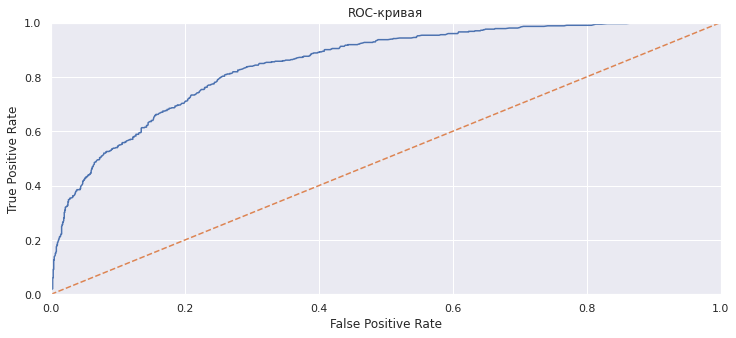

CPU times: user 12min 59s, sys: 3.3 s, total: 13min 3s
Wall time: 13min 5s


In [80]:
%%time

model_forest = RandomForestClassifier(random_state=80822, n_jobs=-1)
params_forest = {'n_estimators': [300, 500, 1000],
                'max_depth': [None, 10, 15],
                'min_samples_leaf': np.arange(1, 6, 2),
                'min_samples_split': np.arange(2, 7, 2)}

best_model_forest = model_learn(model_forest, params_forest)
model_test(best_model_forest)

Посмотрим, какие признаки сыграли важную роль для модели:

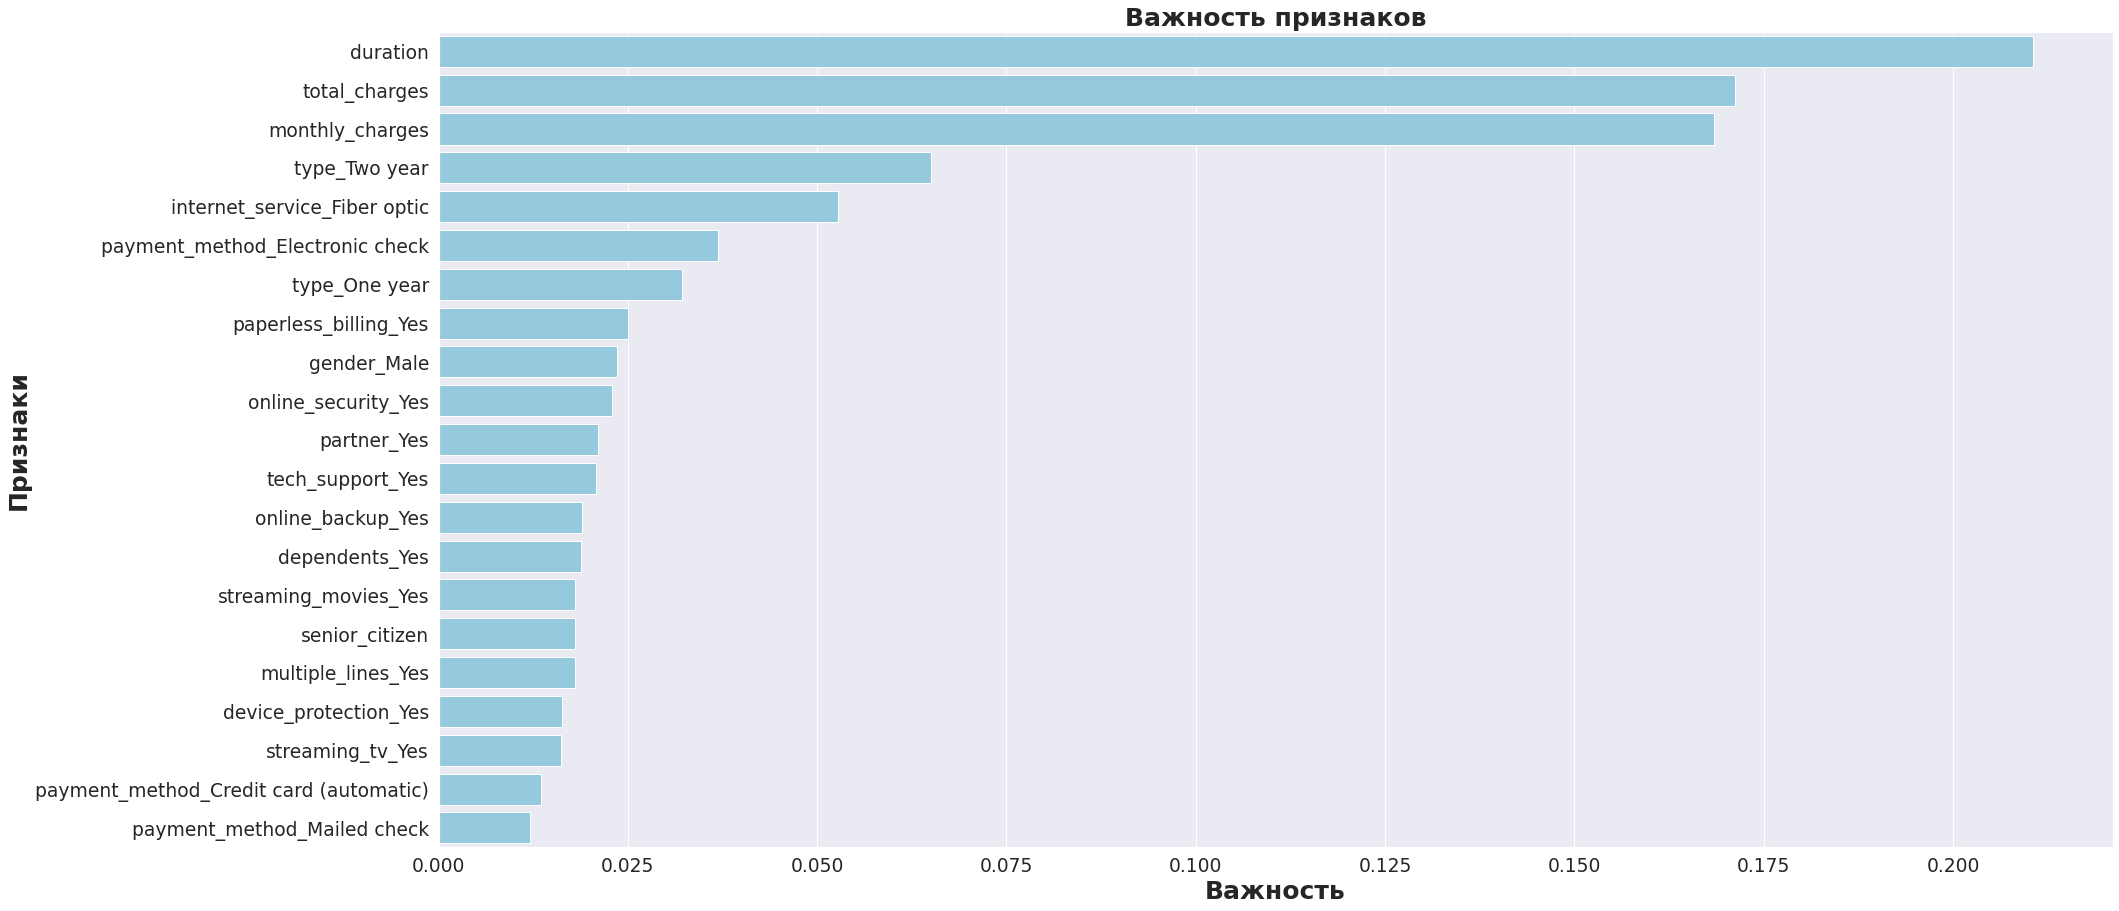

None

,Features,Gini-Importance
0,duration,0.210547
1,total_charges,0.171178
2,monthly_charges,0.168436
3,type_Two year,0.065012
4,internet_service_Fiber optic,0.052700
5,payment_method_Electronic check,0.036899
6,type_One year,0.032135
7,paperless_billing_Yes,0.025000
8,gender_Male,0.023595
9,online_security_Yes,0.022958


In [81]:
ft_importance(best_model_forest)

In [82]:
# Вывод результатов обучения модели случайного леса

result = []

result.append({'Модель' : 'RandomForestClassifier', 
              'Параметры': {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000},
              'Accuracy': 0.793,  
              'AUC-ROC:': 0.849})

pd.DataFrame(result)

,Модель,Параметры,Accuracy,AUC-ROC:
0,RandomForestClassifier,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.793,0.849


### Модель логистической регрессии

Гиперпараметры для кросс-валидации:

* `C` - коэффициент регулиризации, ограничивающий рост весов при признаках

Обучим модель и проверим ее на тестовой выборке:

Лучшее значение метрики ROC-AUC: 0.8363903463023473
Лучшие гиперпараметры: {'C': 0.5272631578947369}
Лучшая модель: LogisticRegression(C=0.5272631578947369, n_jobs=-1, random_state=80822)
Accuracy: 0.743
AUC-ROC: 0.844


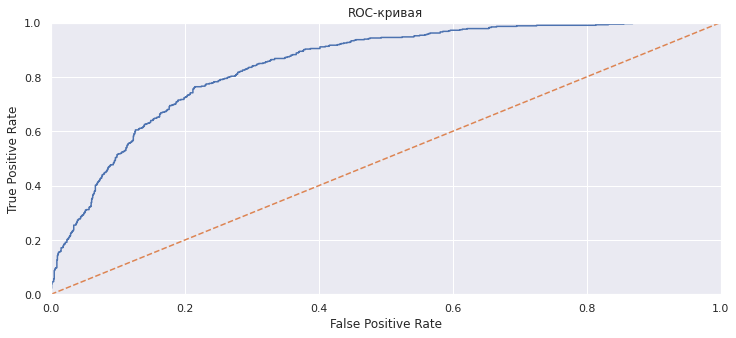

CPU times: user 28.7 s, sys: 44 s, total: 1min 12s
Wall time: 1min 12s


In [83]:
%%time

model_logreg = LogisticRegression(random_state=80822, n_jobs=-1)
params_logreg = {'C': np.linspace(0.001, 10, 20)}

best_model_logreg = model_learn(model_logreg, params_logreg)
model_test(best_model_logreg)

У модели **LogisticRegression** нет метода feature_importances_. Для модели важность признака определяется абсолютным значением его коэффициента. Посчитаем долю влияния каждого признака на предсказание модели **LogisticRegression**, воспользуясь функцией softmax, а затем построим график важности признаков: 

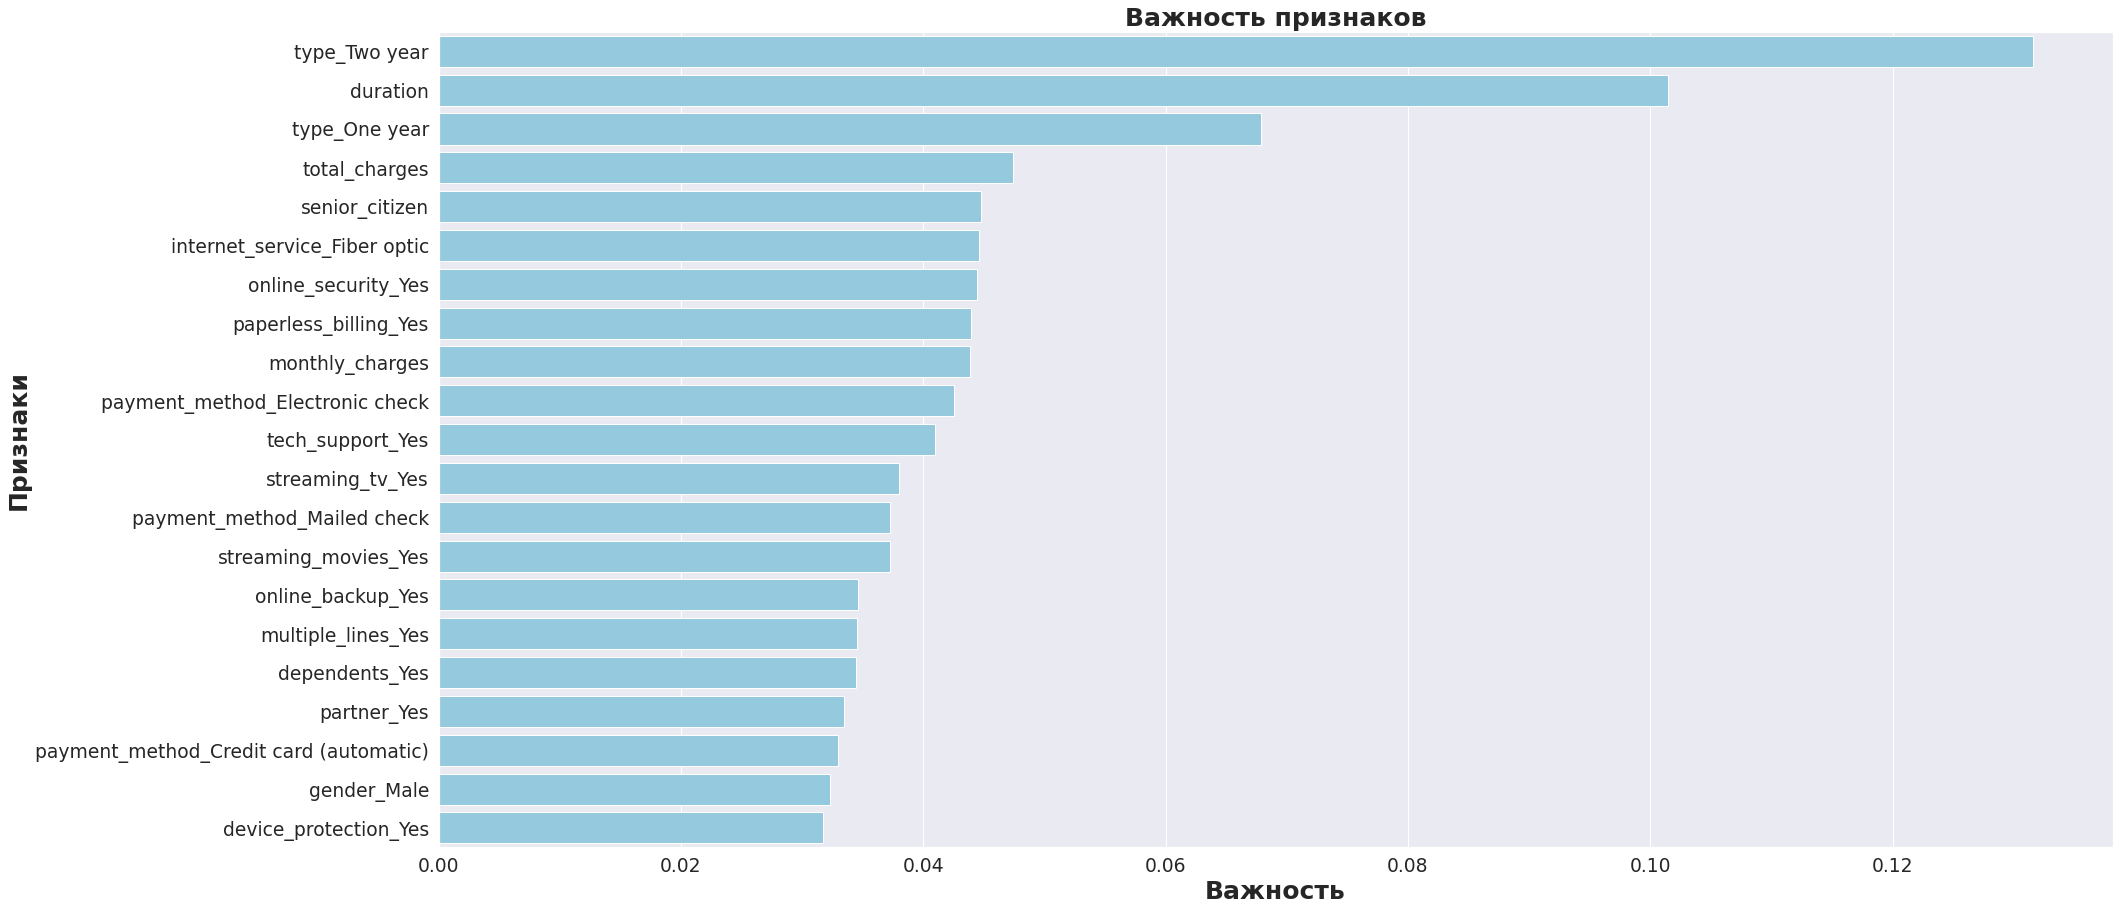

None

,Features,Gini-Importance
0,type_Two year,0.131582
1,duration,0.101467
2,type_One year,0.067874
3,total_charges,0.047372
4,senior_citizen,0.044749
5,internet_service_Fiber optic,0.044616
6,online_security_Yes,0.044439
7,paperless_billing_Yes,0.043912
8,monthly_charges,0.043868
9,payment_method_Electronic check,0.042518


In [84]:
m = softmax(abs(best_model_logreg.coef_))

feats = {}
for feature, importance in zip(train_ft.columns, m[0]):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Важность', fontsize=25, weight = 'bold')
plt.ylabel('Признаки', fontsize=25, weight = 'bold')
plt.title('Важность признаков', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

In [85]:
# Вывод результатов обучения модели логистической регрессии

result.append({'Модель' : 'LogisticRegression', 
              'Параметры': {'C': 0.5272631578947369}, 
              'Accuracy': 0.743,  
              'AUC-ROC:': 0.844})

pd.DataFrame(result)

,Модель,Параметры,Accuracy,AUC-ROC:
0,RandomForestClassifier,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.793,0.849
1,LogisticRegression,{'C': 0.5272631578947369},0.743,0.844


### Модель градиентного бустинга CatBoost

Рассмотрим следующую модель: модель градиентного бустинга **CatBoostClassifier**.

Гиперпараметры для кросс-валидации:

* `n_estimators` - количество решающих деревьев;

* `learning_rate` - коэффициент шага антиградиента;

* `max_depth` - глубина дерева;

* `l2_leaf_reg` - коеффициент при l2 регуризации.

Обучим модель и проверим ее качество на тестовой выборке:

Лучшее значение метрики ROC-AUC: 0.981965483496334
Лучшие гиперпараметры: {'l2_leaf_reg': 1, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 1000}
Лучшая модель: <catboost.core.CatBoostClassifier object at 0x7f030e05b3d0>
Accuracy: 0.845
AUC-ROC: 0.892


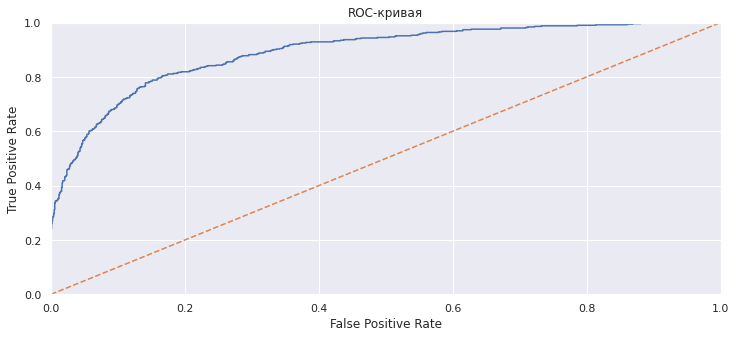

CPU times: user 8min 9s, sys: 6.08 s, total: 8min 15s
Wall time: 10min 38s


In [87]:
%%time

model_cat = CatBoostClassifier(random_state=80822, verbose=0)
params_cat = {'n_estimators': [300, 500, 1000],
                      'learning_rate': [0.01, 0.1, 1],
                      'max_depth': [1, 5, 9],
                      'l2_leaf_reg': [1, 3]}

best_model_cat = model_learn(model_cat, params_cat)
model_test(best_model_cat)

Важные признаки модели:

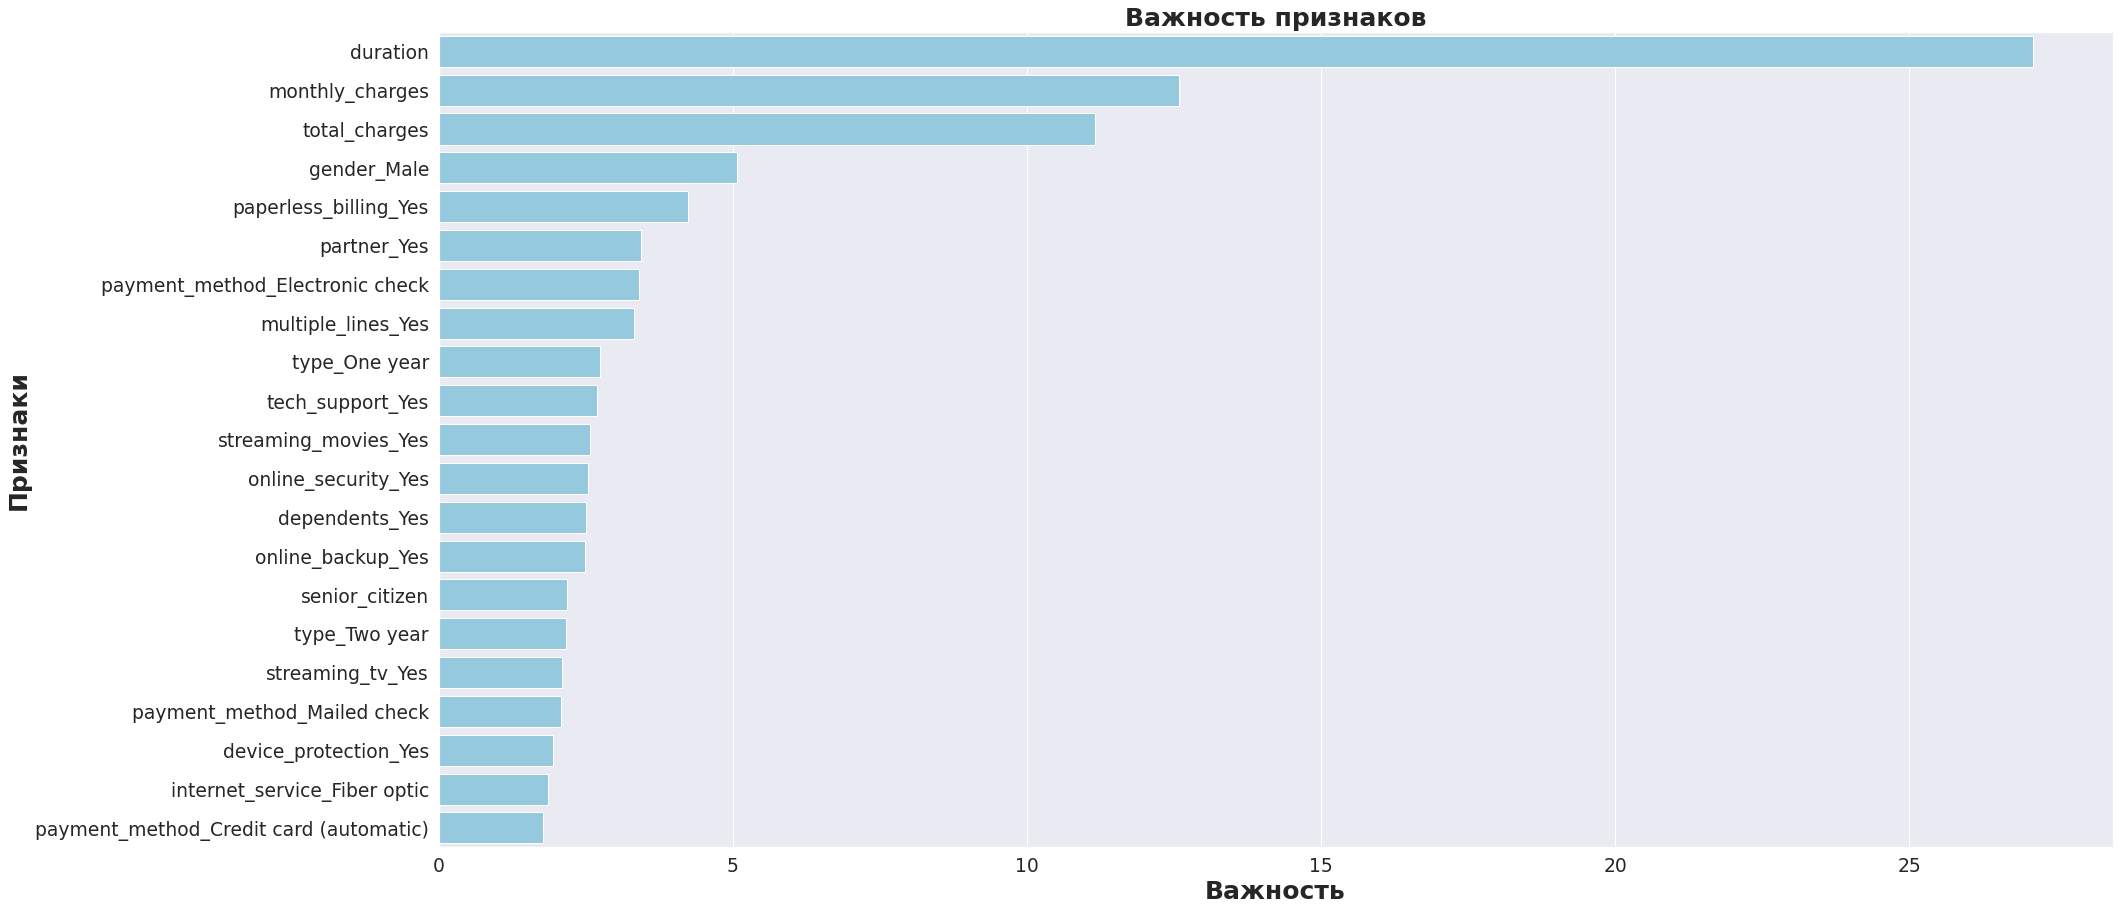

None

,Features,Gini-Importance
0,duration,27.101653
1,monthly_charges,12.583004
2,total_charges,11.161655
3,gender_Male,5.072767
4,paperless_billing_Yes,4.247503
5,partner_Yes,3.444910
6,payment_method_Electronic check,3.414365
7,multiple_lines_Yes,3.325375
8,type_One year,2.739833
9,tech_support_Yes,2.689344


In [88]:
ft_importance(best_model_cat)

In [91]:
# Вывод результатов обучения модели CatBoostClassifier

result.append({'Модель' : 'CatBoostClassifier', 
              'Параметры': {'l2_leaf_reg': 1, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 1000}, 
              'Accuracy': 0.845,  
              'AUC-ROC:': 0.892})

pd.DataFrame(result)

,Модель,Параметры,Accuracy,AUC-ROC:
0,RandomForestClassifier,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.793,0.849
1,LogisticRegression,{'C': 0.5272631578947369},0.743,0.844
2,CatBoostClassifier,"{'l2_leaf_reg': 1, 'learning_rate': 0.1, 'max_...",0.845,0.892


### Модель градиентного бустинга LightGBM

Гиперпараметры для кросс-валидации:

* `n_estimators` - количество решающих деревьев;

* `learning_rate` - коэффициент шага антиградиента;

* `max_depth` - глубина дерева;

* `l2_leaf_reg` - коеффициент при l2 регуризации.

Обучим модель и проверим ее качество на тестовой выборке:

Лучшее значение метрики ROC-AUC: 0.9816786405611007
Лучшие гиперпараметры: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 1000}
Лучшая модель: LGBMClassifier(max_depth=9, n_estimators=1000, random_state=80822)
Accuracy: 0.855
AUC-ROC: 0.908


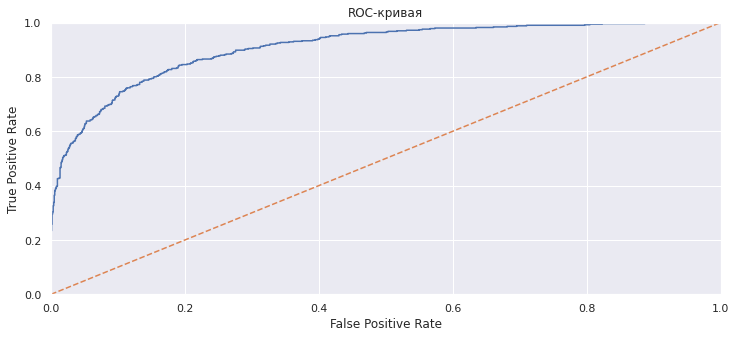

CPU times: user 2h 37s, sys: 9.56 s, total: 2h 47s
Wall time: 2h 55s


In [98]:
%%time

model_lgbm = LGBMClassifier(random_state=80822, n_jobs=-1)
params_lgbm = {'n_estimators': [300, 500, 1000],
              'learning_rate': [0.01, 0.1, 1],
              'max_depth': [1, 5, 9]}

best_model_lgbm = model_learn(model_lgbm, params_lgbm)
model_test(best_model_lgbm)

Важные признаки:

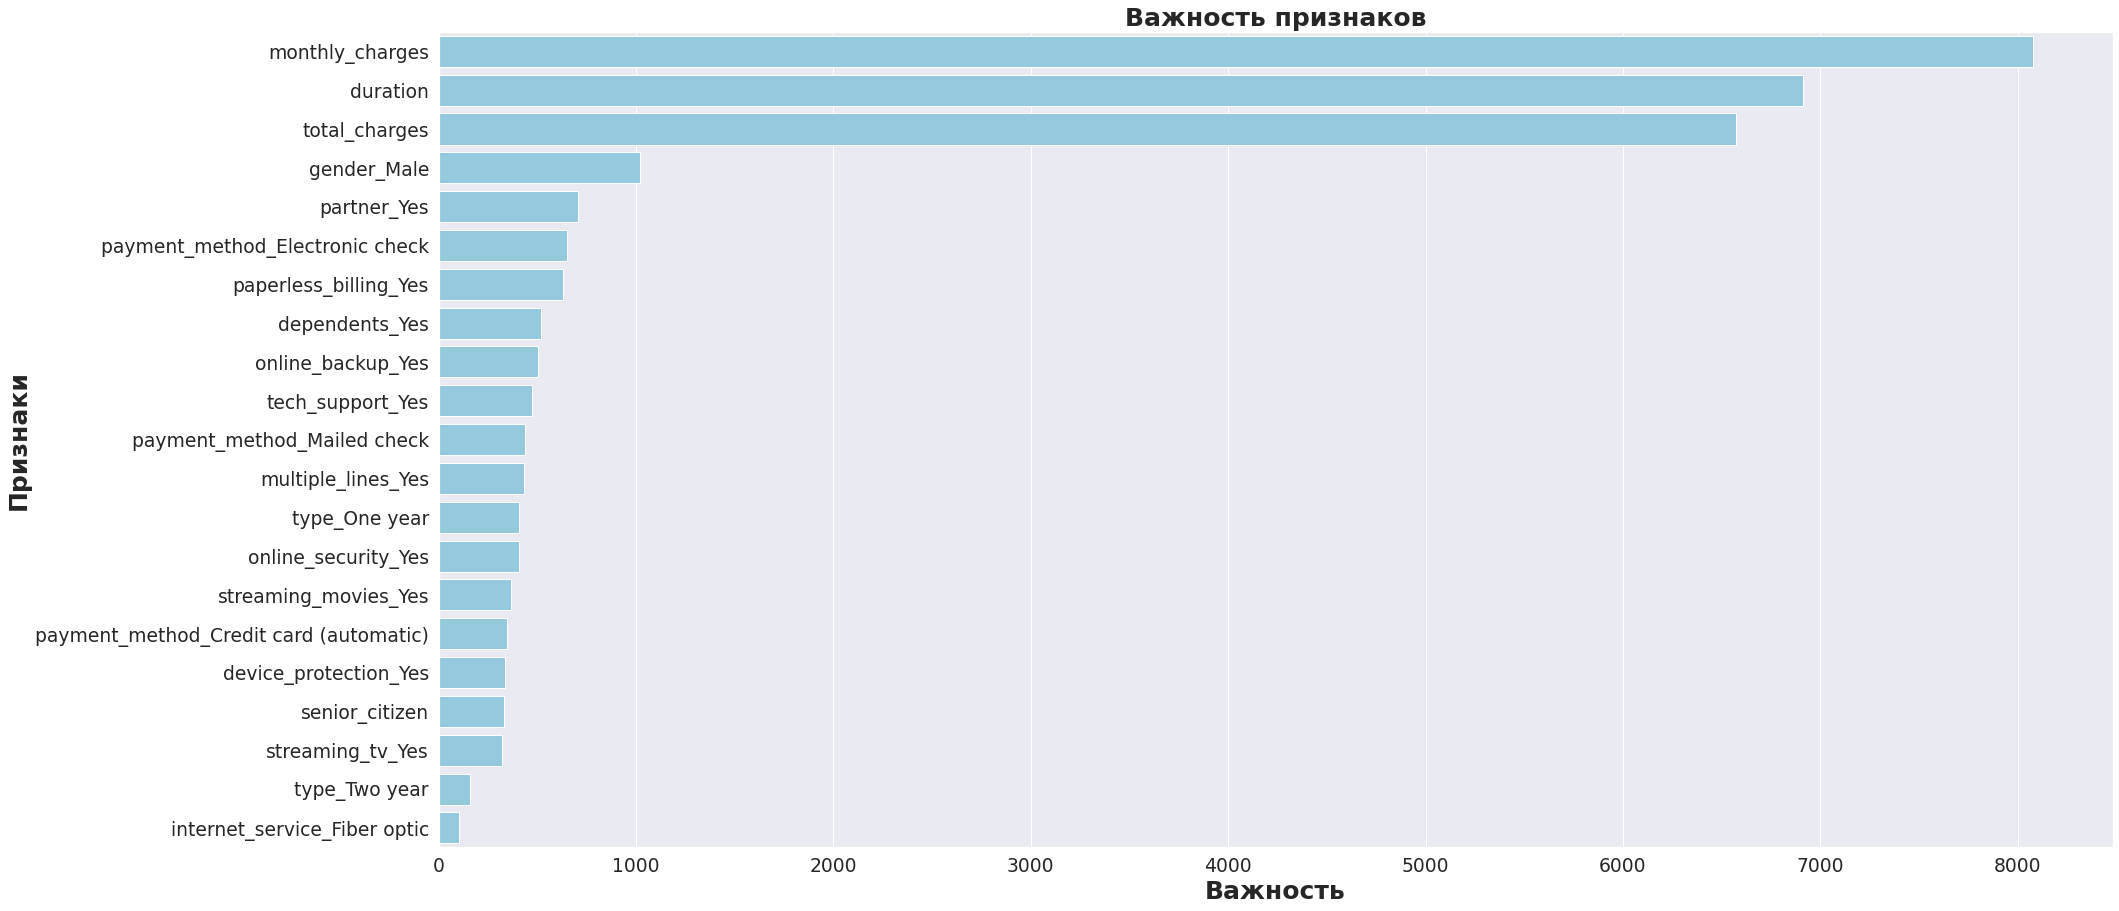

None

,Features,Gini-Importance
0,monthly_charges,8077
1,duration,6915
2,total_charges,6575
3,gender_Male,1020
4,partner_Yes,708
5,payment_method_Electronic check,649
6,paperless_billing_Yes,631
7,dependents_Yes,519
8,online_backup_Yes,504
9,tech_support_Yes,472


In [99]:
ft_importance(best_model_lgbm)

In [102]:
# Вывод результатов обучения модели LGBMClassifier

result.append({'Модель' : 'LGBMClassifier', 
              'Параметры': {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 1000}, 
              'Accuracy': 0.855,  
              'AUC-ROC:': 0.908})

pd.DataFrame(result)

,Модель,Параметры,Accuracy,AUC-ROC:
0,RandomForestClassifier,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.793,0.849
1,LogisticRegression,{'C': 0.5272631578947369},0.743,0.844
2,CatBoostClassifier,"{'l2_leaf_reg': 1, 'learning_rate': 0.1, 'max_...",0.845,0.892
3,LGBMClassifier,"{'learning_rate': 0.1, 'max_depth': 9, 'n_esti...",0.855,0.908


**Вывод:**

* Модель логистической регрессии уступает всем остальным моделям по значениям метрик качества (accuracy и AUC-ROC), но значительно выигрывает в скорости обучения (1 мин 55 сек);

* Качество предсказаний модели случайного леса всего-лишь на несколько сотых лучше, а скорость ее обучения находится на третьем месте из всех использованных моделей (13 мин 5 сек);

* Лучшие показатели мтерик у моделей градиентного бустинга;

* Лучший результат по соотношению качества и скорости обучения показала модель градиентного бустинга **CatBoostClassifier**: находится на втором месте по скорости обучения после логистической регрессии (10 мин 38 сек) и имеет качество **`AUC-ROC = 0.89`** при следующих параметрах:
    - `random_state` = 80822;
    
    - `l2_leaf_reg` = 1;
    
    - `learning_rate` = 0.1;
    
    - `max_depth` = 9;
    
    - `n_estimators` = 1000;
* Лучший результат качества показала модель градиентного бустинга LightGBM, однако оказалась на последнем месте по скорости обучения с довольно большим отрывом (2 часа 55 мин). Поэтому статус лучшей модели получила модель CatBoost, показавшая качество всего на одну десятую меньше, но обучающаяся во много раз быстрее. 

Топ-3 важных признака для обучения модели градиентного бустинга CatBoost:
1. duration
2. monthly_charges
3. total_charges

## Общий вывод:

* Исследовательский анализ данных позволил определить группы пользователей, склонных к уходу. Даже без машинного обучения можно сформировать портреты лояльных и нелояльных клиентов и предпринять соответствующие действия, направленные на удержание клиентов, например:
    - Чаще всего, у ушедших клиентов ежемесячный платеж был слишком высоким. Их уход может объясняться тем, что их ожидания при такой большой цене за услуги не оправдывался. В таком случае, стоило бы предлагать таким клиентам скиидки "за активное пользование услугами", например.
    - Клиенты уходят на первых месяцах использования услуг компании, активные клиенты остаются на более долгое время. Возможно, стоит предлагать какие-то бонусы или скидки клиентам после первого месяца пользования услугами (при условии того, что они платят за дорогие тарифы)
    - Подключенные дополнительные услуги положительно влияют на удержание клиента. Возможно, стоит предлагать клиентам дополнительные услуги по скидкам или же в качестве бонусов;
    
* Были обучены разные модели машинного обучения:
    - **Лучший результат показала модель градиентного бустинга CatBoost по соотношению качества и времени обучения**:
        * `Accuracy` = 0.85;
        
        * **`AUC-ROC` = 0.89**;
        
        * Параметры: {'random_state': 80822, 'l2_leaf_reg': 1, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 1000}
        
        * Время обучения: 10 минут 38 секунд

* Наиболее важными признаками стали:
    - Продолжительность пользования услугами;
    - Ежемесячный платеж;
    - Суммарная опалата.